In [169]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras import initializers
from tensorflow.keras.models import Model

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [170]:
IMG_SIZE=224
IMG_SHAPE=(IMG_SIZE, IMG_SIZE, 3)

In [171]:
object_classes = { 1: 'car', 2: 'truck', 3: 'person', 4: 'bicycle', 5: 'traffic light'}
colors = { 1: 'yellow', 2: 'red', 3: 'blue', 4: 'green', 5: 'purple'}

### Load data

In [254]:
base_path = './archive/images/'
test_image_name='1479500528611297018.jpg'

In [173]:
df = pd.read_csv('./archive/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
119755,1479505114420439398.jpg,193,216,124,145,2
10418,1478020981720602221.jpg,305,314,103,116,5
107501,1479504154855822512.jpg,97,114,144,160,1
45655,1478897495086233786.jpg,151,221,139,194,1
79280,1479500492594533543.jpg,164,182,142,156,1


In [174]:
img = cv2.imread(base_path + "1478731911486196398.jpg")
original_height, original_width, _ = img.shape

In [175]:
all_imgs={}
classes_count = {'car' : 1, 'truck': 2, 'person': 3, 'bicycle': 4, 'traffic_light': 5}

i = 1


### MobileNetV2 as CNN 

In [176]:
mobilenetv2 = keras.applications.mobilenet_v2.MobileNetV2(
    include_top = False,   
    weights = 'imagenet',
    input_shape = IMG_SHAPE
)

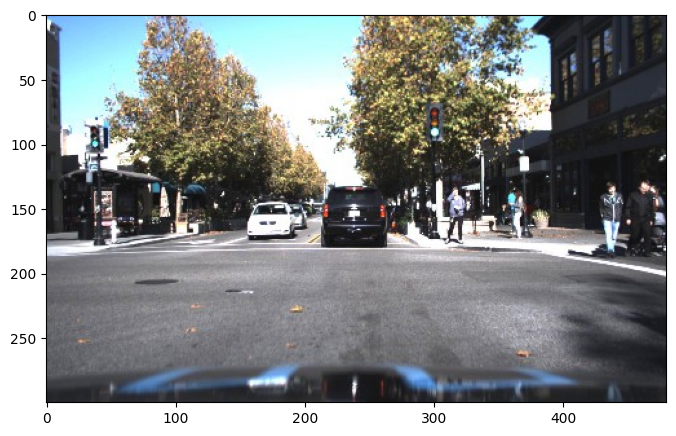

In [177]:
base_path = './archive/images/'
image_name = '1479504710394087141.jpg'
image = cv2.imread(base_path + image_name)
plt.figure(figsize = (8,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [178]:
img = cv2.resize(image, dsize=(IMG_SIZE, IMG_SIZE))

In [179]:
len(mobilenetv2.layers)

154

In [180]:
mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [181]:
img_ = np.copy(img)[np.newaxis,:]


In [182]:
l=0
for layer in mobilenetv2.layers:
    output = keras.backend.function([mobilenetv2.layers[0].input], [layer.output])
    print(output(img_)[0].shape, l)
    l +=1

(1, 224, 224, 3) 0
(1, 112, 112, 32) 1
(1, 112, 112, 32) 2
(1, 112, 112, 32) 3
(1, 112, 112, 32) 4
(1, 112, 112, 32) 5
(1, 112, 112, 32) 6
(1, 112, 112, 16) 7
(1, 112, 112, 16) 8
(1, 112, 112, 96) 9
(1, 112, 112, 96) 10
(1, 112, 112, 96) 11
(1, 113, 113, 96) 12
(1, 56, 56, 96) 13
(1, 56, 56, 96) 14
(1, 56, 56, 96) 15
(1, 56, 56, 24) 16
(1, 56, 56, 24) 17
(1, 56, 56, 144) 18
(1, 56, 56, 144) 19
(1, 56, 56, 144) 20
(1, 56, 56, 144) 21
(1, 56, 56, 144) 22
(1, 56, 56, 144) 23
(1, 56, 56, 24) 24
(1, 56, 56, 24) 25
(1, 56, 56, 24) 26
(1, 56, 56, 144) 27
(1, 56, 56, 144) 28
(1, 56, 56, 144) 29
(1, 57, 57, 144) 30
(1, 28, 28, 144) 31
(1, 28, 28, 144) 32
(1, 28, 28, 144) 33
(1, 28, 28, 32) 34
(1, 28, 28, 32) 35
(1, 28, 28, 192) 36
(1, 28, 28, 192) 37
(1, 28, 28, 192) 38
(1, 28, 28, 192) 39
(1, 28, 28, 192) 40
(1, 28, 28, 192) 41
(1, 28, 28, 32) 42
(1, 28, 28, 32) 43
(1, 28, 28, 32) 44
(1, 28, 28, 192) 45
(1, 28, 28, 192) 46
(1, 28, 28, 192) 47
(1, 28, 28, 192) 48
(1, 28, 28, 192) 49
(1, 28, 28,

In [183]:
cnn = Model(inputs=[mobilenetv2.layers[0].input], outputs=[mobilenetv2.layers[151].output])
cnn.predict(img_).shape

1/1 [==============================] - 1s 1s/step


(1, 7, 7, 1280)

In [184]:
feature_maps = cnn.predict(np.expand_dims(img, 0))
_, w_feature_map, h_feature_map, _ = feature_maps.shape
feature_maps.shape

1/1 [==============================] - 0s 28ms/step


(1, 7, 7, 1280)

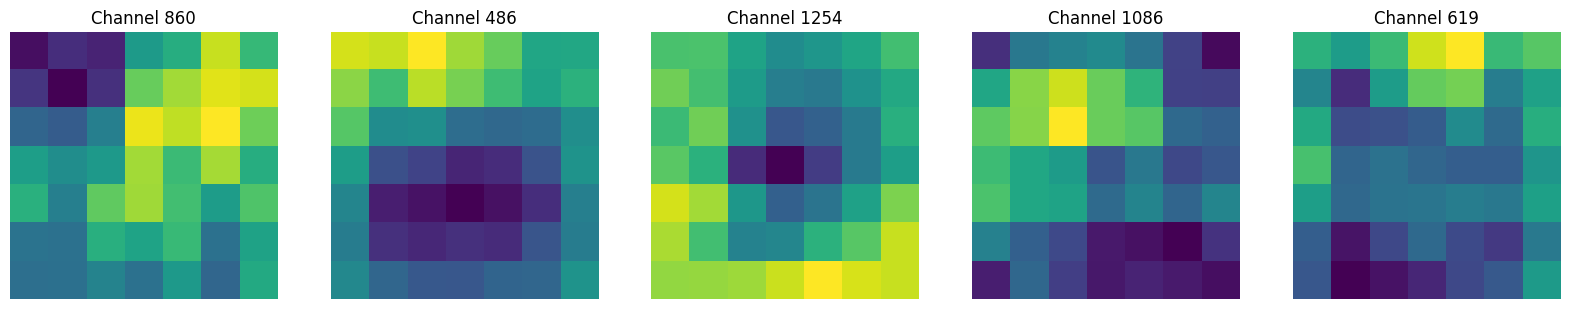

In [185]:
num_channels_to_visualize = 5
fig, axes = plt.subplots(1, num_channels_to_visualize, figsize=(20, 4))

for i in range(num_channels_to_visualize):
    channel_idx = np.random.randint(1280)  # Randomly select a channel
    channel_activation = feature_maps[0, :, :, channel_idx]
    axes[i].imshow(channel_activation, cmap='viridis')
    axes[i].set_title('Channel {}'.format(channel_idx))
    axes[i].axis('off')

plt.show()

### Anchors

In [186]:
n_anchor_pos = w_feature_map * h_feature_map

In [187]:
def gen_anc_centers(size):
    h, w = size, size
    anc_pts_x = np.arange(0, w) + 0.5
    anc_pts_y = np.arange(0, h) + 0.5

    return anc_pts_x, anc_pts_y

In [188]:
anc_pts_x, anc_pts_y = gen_anc_centers(7)

In [189]:
x_stride = int(IMG_SIZE / w_feature_map)
y_stride = int(IMG_SIZE / h_feature_map)
x_stride, y_stride

(32, 32)

In [190]:
anc_pts_x_proj = anc_pts_x * x_stride 
anc_pts_y_proj = anc_pts_y * y_stride

In [191]:
anc_pts_y

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

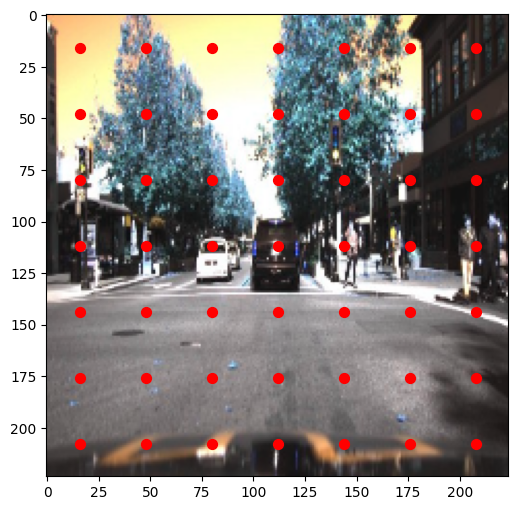

In [192]:
# visualizing the anchor positions
img_ = np.copy(img)
plt.figure(figsize=(9, 6))
plt.imshow(img_)
for x in anc_pts_x_proj:
    for y in anc_pts_y_proj:
        plt.scatter(x, y, color="red", s=50)
    
plt.show()

### Anchor boxes

In [193]:
anc_scales = [1, 2, 3]
anc_ratios = [0.5, 1, 2]
num_of_boxes_per_anc = 9
num_of_anc_positions = h_feature_map * w_feature_map


In [194]:
def clip_boxes_to_image(boxes, size):
    # Unpack image size
    img_height, img_width = size
    
    # Clip boxes to image boundaries
    for box in boxes:
        box[0] = max(0, min(box[0], img_width))
        box[1] = max(0, min(box[1], img_height)) 
        box[2] = max(0, min(box[2], img_width)) 
        box[3] = max(0, min(box[3], img_height))   
    
    return boxes

def gen_anc_base(anc_pts_x, anc_pts_y, anc_scales, anc_ratios, out_size):
    n_anc_boxes = len(anc_scales) * len(anc_ratios)
    anc_base = np.zeros((1, anc_pts_x.shape[0], anc_pts_y.shape[0], n_anc_boxes, 4)) # shape - [1, Hmap, Wmap, n_anchor_boxes, 4]
    
    for ix, xc in enumerate(anc_pts_x):
        for jx, yc in enumerate(anc_pts_y):
            anc_boxes = np.zeros((n_anc_boxes, 4))
            c = 0
            for i, scale in enumerate(anc_scales):
                for j, ratio in enumerate(anc_ratios):
                    w = scale * ratio
                    h = scale
                    
                    xmin = xc - w / 2
                    ymin = yc - h / 2
                    xmax = xc + w / 2
                    ymax = yc + h / 2

                    anc_boxes[c, :] = np.array([xmin, ymin, xmax, ymax])
                    c += 1

            anc_base[0, ix, jx, :] = clip_boxes_to_image(anc_boxes, out_size)
            
    return anc_base

In [195]:
total_anchors = num_of_boxes_per_anc * num_of_anc_positions

In [196]:
al=[]
anc_list = np.zeros(shape=(total_anchors, 4))
count = 0

for x in anc_pts_x:
    for y in anc_pts_y:
        for ratio in anc_ratios:
            for scale in anc_scales:
                #h = pow(pow(scale, 2)/ ratio, 0.5)
                #w = h * ratio
                #print(x,y,h,w)

                # as h and w would be really small, we will scale them with some constant (in our case, stride width and height)
                #h *= x_stride
                #w *= y_stride

                w = scale * ratio
                h = scale

            # * at this point we have height and width of anchor and centers of anchor locations
            # putting anchor 9 boxes at each anchor locations
                anchor_xmin = x - 0.5 * w
                anchor_ymin = y - 0.5 * h
                anchor_xmax = x + 0.5 * w
                anchor_ymax = y + 0.5 * h
                al.append([x, y, w, h])
            # append the anchor box to anchor list
                anc_list[count] = [anchor_xmin, anchor_ymin, anchor_xmax, anchor_ymax]
                count += 1

In [197]:
anc_list

array([[ 0.25,  0.  ,  0.75,  1.  ],
       [ 0.  , -0.5 ,  1.  ,  1.5 ],
       [-0.25, -1.  ,  1.25,  2.  ],
       ...,
       [ 5.5 ,  6.  ,  7.5 ,  7.  ],
       [ 4.5 ,  5.5 ,  8.5 ,  7.5 ],
       [ 3.5 ,  5.  ,  9.5 ,  8.  ]])

In [198]:
img.shape

(224, 224, 3)

8 0 24 32
0 -16 32 48
-8 -32 40 64
0 0 32 32
-16 -16 48 48
-32 -32 64 64
-16 0 48 32
-48 -16 80 48
-80 -32 112 64
8 32 24 64
0 16 32 80
-8 0 40 96
0 32 32 64
-16 16 48 80
-32 0 64 96
-16 32 48 64
-48 16 80 80
-80 0 112 96
8 64 24 96
0 48 32 112
-8 32 40 128
0 64 32 96
-16 48 48 112
-32 32 64 128
-16 64 48 96
-48 48 80 112
-80 32 112 128
8 96 24 128
0 80 32 144
-8 64 40 160
0 96 32 128
-16 80 48 144
-32 64 64 160
-16 96 48 128
-48 80 80 144
-80 64 112 160
8 128 24 160
0 112 32 176
-8 96 40 192
0 128 32 160
-16 112 48 176
-32 96 64 192
-16 128 48 160
-48 112 80 176
-80 96 112 192
8 160 24 192
0 144 32 208
-8 128 40 224
0 160 32 192
-16 144 48 208
-32 128 64 224
-16 160 48 192
-48 144 80 208
-80 128 112 224
8 192 24 224
0 176 32 240
-8 160 40 256
0 192 32 224
-16 176 48 240
-32 160 64 256
-16 192 48 224
-48 176 80 240
-80 160 112 256
40 0 56 32
32 -16 64 48
24 -32 72 64
32 0 64 32
16 -16 80 48
0 -32 96 64
16 0 80 32
-16 -16 112 48
-48 -32 144 64
40 32 56 64
32 16 64 80
24 0 72 96
32 32 64

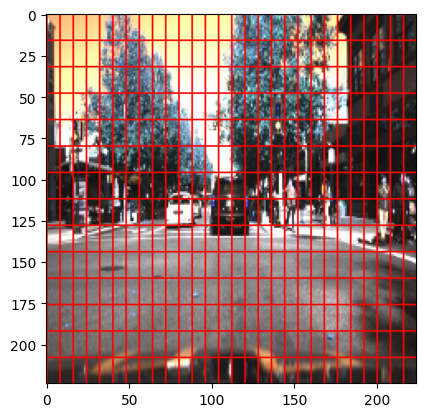

In [199]:
img_ = np.copy(img)

for i in range(0, 441):
    x_min = int(anc_list[i][0] * x_stride)
    y_min = int(anc_list[i][1] * y_stride)
    x_max = int(anc_list[i][2] * x_stride)
    y_max = int(anc_list[i][3] * y_stride)
    print(x_min, y_min, x_max, y_max)
    cv2.rectangle(img_, (x_min, y_min), (x_max, y_max), color=(255, 0, 0), thickness=1) 
plt.imshow(img_)
plt.show()

In [230]:
pic_num = 0

In [243]:
from shapely.geometry import Polygon
from PIL import Image, ImageDraw
import time
import random
def get_polygon(box):
    xmin, ymin, xmax, ymax = box
    polygon = Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin)])
    return polygon
def iou(box_1, box_2, pic_num):
    poly_1 = get_polygon(box_1)
    poly_2 = get_polygon(box_2)
    image = Image.new("RGB", (224, 224), "yellow")
    draw = ImageDraw.Draw(image)

    # Draw the first box in red
    draw.polygon([(box_1[0], box_1[1]), (box_1[0], box_1[3]), 
                  (box_1[2], box_1[3]), (box_1[2], box_1[1])], outline="red")

    # Draw the second box in blue
    draw.polygon([(box_2[0], box_2[1]), (box_2[0], box_2[3]), 
                  (box_2[2], box_2[3]), (box_2[2], box_2[1])], outline="blue")

    # Save the image with boxes drawn
    timestamp = str(int(time.time()))
    
    iou = poly_1.intersection(poly_2).area / poly_1.union(poly_2).area
    draw.text((50, 50), f"IoU: {iou:.4f}", fill="black")
    image.save(f"test/boxes_with_iou_{pic_num}.png") 
    #print(poly_1)
    #print(poly_2)
    return iou


In [244]:
box_1 = [111, 41, 156, 76]
box_2 = [110, 59, 200, 94]

print(iou(box_1, box_2, 0))

0.19318181818181818


In [202]:
anc_list_proj = anc_list * x_stride
#anchor boxes inside the image
ids = np.where(
    (anc_list_proj[:,0] >= 0) &
    (anc_list_proj[:,1] >= 0) &
    (anc_list_proj[:,2] <= IMG_SIZE) &
    (anc_list_proj[:,3] <= IMG_SIZE))[0]
anchor_boxes = anc_list_proj[ids]
anchor_boxes.shape

(263, 4)

### Calculate rpn

In [203]:
bboxes = df[df['frame'] == "1479504710394087141.jpg"]
bboxes
gta = np.zeros((5, 4))
gta

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [258]:
#anc_list are anchors for feature map
def calc_rpn(img_name, anchor_boxes):
    img_bgr = cv2.imread(base_path + image_name)
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    bboxes = df[df['frame'] == img_name]
    #print(original_width)
    #print(bboxes)
    num_bboxes = len(bboxes)
    gta = np.zeros((num_bboxes, 4))
    i=0
    for index, row in bboxes.iterrows():
        gta[i, 0] = row['xmin'] * (IMG_SIZE / float(original_width))
        gta[i, 1] = row['ymin'] * (IMG_SIZE / float(original_height))
        gta[i, 2] = row['xmax'] * (IMG_SIZE / float(original_width))
        gta[i, 3] = row['ymax'] * (IMG_SIZE / float(original_height))
        i += 1

    #print(gta)
    pic_num = 0
    iou_list = np.zeros((len(anchor_boxes), num_bboxes))
    for anchor_id in range(len(anchor_boxes)):
        bbox_type = 'neg'
        best_iou = 0.0
        
        for gt_box_id in range(len(gta)):
            iou_list[anchor_id][gt_box_id] = iou(anchor_boxes[anchor_id], gta[gt_box_id], pic_num)
            pic_num += 1

    data = {"anchor_id" :ids}
    data.update({f"object_{idx}_iou":iou_list[:, idx] for idx in range(num_bboxes)})
    data["max_iou"] = iou_list.max(axis = 1)
    data["best_gt"] = iou_list.argmax(axis=1)
    df_iou = pd.DataFrame(data)


    # getting anchor boxes having maximum IOU for each ground truth boxes
    best_ious = df_iou.drop(["anchor_id", "max_iou", "best_gt"],axis= 1).max().values
    print(f"Top IOUs for each object in the image: {best_ious}")

    # getting anchor box idx having maximum overlap with ground truth boxes * ignoring anchor id column
    best_anchors = df_iou.drop(["anchor_id", "max_iou", "best_gt"],axis= 1).values.argmax(axis= 0)
    print(f"Top anchor boxes index: {best_anchors}")

    # get all the anchor boxes having same IOU score
    top_anchors = np.where(iou_list == best_ious)[0]
    print(f"Anchor boxes with same IOU score: {top_anchors}")
    return df_iou

In [259]:
df_iou = calc_rpn("1479500528611297018.jpg", anchor_boxes)
df_iou

Top IOUs for each object in the image: [0.055125   0.69614006 0.0245     0.49316068 0.0735     0.02353234
 0.520625   0.0520625 ]
Top anchor boxes index: [179 254  82 123  79  82 223 179]
Anchor boxes with same IOU score: [ 79  82  82 123 179 179 223 254]


,anchor_id,object_0_iou,object_1_iou,object_2_iou,object_3_iou,object_4_iou,object_5_iou,object_6_iou,object_7_iou,max_iou,best_gt
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
258,423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
259,424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
260,426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
261,432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### RPN

In [206]:
input_shape=(w_feature_map, h_feature_map, 512)
k = 9

In [207]:
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
input = Input(shape = input_shape)
conv_1 = Conv2D(512, kernel_size = 3, padding = "same", kernel_initializer = "normal")(input) # add bias initializer

regressor = Conv2D(4*k, kernel_size = 1, activation = "linear", name="delta_regressor", kernel_initializer="normal")(conv_1)

classifier = Conv2D(k, kernel_size = 1, activation = "sigmoid", name="objectivness_score", kernel_initializer="normal")(conv_1)

RPN = Model(inputs = [input], outputs = [regressor, classifier])

RPN.summary()

Model: "model_467"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 7, 7, 512)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 7, 7, 512)    2359808     ['input_8[0][0]']                
                                                                                                  
 delta_regressor (Conv2D)       (None, 7, 7, 36)     18468       ['conv2d_4[0][0]']               
                                                                                                  
 objectivness_score (Conv2D)    (None, 7, 7, 9)      4617        ['conv2d_4[0][0]']               
                                                                                          

### Loss functions

In [208]:
def smooth_l1_loss(y_true, y_pred):
    x = K.abs(y_true - y_pred)

    mask = K.cast(K.less(x, 1.0), "float32")
    loss = (mask * (0.5 * x ** 2)) + (1 - mask) * (x - 0.5)
    return loss

def custom_l1_loss(y_true, y_pred):
    offset_list = Y_true[:,:,:-1]
    label_list = y_true[:,:,-1]

    y_pred = tf.reshape(y_pred, shape = (-1, n_anchors, 4))

    positive_ids = tf.where(K.equal(label_list, 1))

    bbox = tf.gather_nd(y_pred, positive_ids)

    target_bbox = tf.gather_nd(offset_list, positive_ids)
    loss = smooth_l1_loss(target_bbox, bbox)

    return K.mean(loss)

def custom_binary_loss(y_true, y_pred_objectiveness):
    y_pred = tf.reshape(y_pred_objectiveness, shape=(-1, n_anchors))
    y_true = tf.squeeze(y_true, -1)

    # positive and negative indices
    indices = tf.where(K.not_equal(y_true, -1))

    rpn_match_logits = tf.gather_nd(y_pred, indices)
    anchor_class = tf.gather_nd(y_true, indices)

    loss = K.binary_crossentropy(target = n_anchor_class, output=rpn_match_logits)
    loss = K.switch(tf.size(loss) > 0, K.mean(loss), tf.constant(0.0))

    return loss


In [209]:
RPN.compile(loss = [custom_l1_loss, custom_binary_loss], optimizer="adam")

In [210]:
label_list.shape, offset_list_label_list.shape, feature_maps.shape

NameError: name 'label_list' is not defined

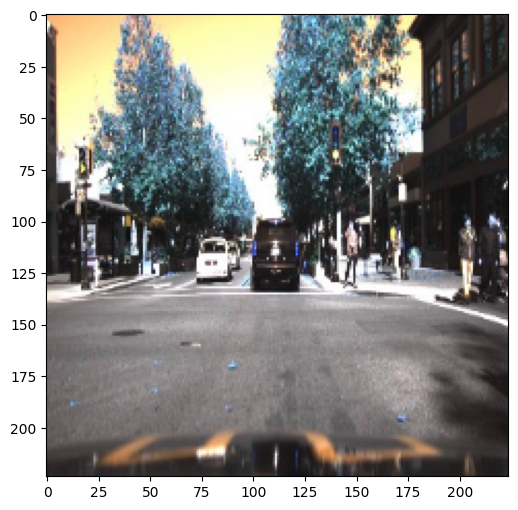

In [ ]:
img_ = np.copy(img)
plt.figure(figsize=(9, 6))
plt.imshow(img_)